<img src="Airbnb_Logo1.png" width="300" height="100">

### Capstone Project 
#### Project Title: Using Machine Learning to develop a recommendation system for London neighbourhoods
#### Student Name: Zinia Bhattacharya
#### Notebook 4- Modelling Part 2

---------------------------------------------------------

#### Summary of Modelling Part 2

In part 2 of our modelling task, we introduce an additional datasource. We have used ChatGPT to source neighbourhood characteristics of the top 100 suburbs (sorted by number of airbnb listings)<br>.
From our initial modelling, we recognized that the way neighbourhoods are described in the airbnb listings can be limiting in profiling the suburbs appropriately. It is primarily because neighbourhood descriptions are written in a way that highlight accessibility of the property to Central London or to tourist attractions and parks and restaurants resulting in very similar terms across majority of listings<br>.

The project's emphasis is to identify unique neighbourhood vibes and match neighbourhoods to distinct guest preferences. For this purpose, Chat GPT's neighbourhood descriptions proved very useful and relevant.

Following on from our work in Part 1, we applied diltilBERT sentence embedding on ChatGPT's neighbourhood descriptions(suburb_tags) and ran KMeans and DBSCAN clustering models. DBSCAN did not perform well but KMeans results were very encouraging. We identified some distinct neighbourhood clusters that can form a strong basis to for our neighbourood recommender system.

In [2]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#sklearn
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, re, TfidfVectorizer
from sklearn.feature_extraction.text import strip_accents_ascii, strip_accents_unicode, strip_tags

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import silhouette_score
np.random.seed(12345)
import warnings
warnings.filterwarnings('ignore')


In [11]:

#Loading the final cleaned df (df4) with missing suburbs filled in
df4=joblib.load("C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\Data\\df_suburb_clean.pkl")

In [ ]:
#Loading the final cleaned df (df4) with missing suburbs filled in

**Identifying Top 100 suburbs**

In [12]:
df5=df4.groupby(['suburb']).count().sort_values(by = 'id',ascending=False).apply(list).reset_index()
df5.head(100)

,suburb,id,name,neighborhood_overview,London_borough,latitude,longitude,minimum_nights,property_type,room_type,price,review_scores_location
0,Whitechapel,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053
1,Earl's Court,700,700,700,700,700,700,700,700,700,700,700
2,Bayswater,640,640,640,640,640,640,640,640,640,640,640
3,Brook Green,633,633,633,633,633,633,633,633,633,633,633
4,Paddington,632,632,632,632,632,632,632,632,632,632,632
...,...,...,...,...,...,...,...,...,...,...,...,...
95,East Dulwich,149,149,149,149,149,149,149,149,149,149,149
96,Hillingdon,149,149,149,149,149,149,149,149,149,149,149
97,Hanwell,149,149,149,149,149,149,149,149,149,149,149
98,Dollis Hill,144,144,144,144,144,144,144,144,144,144,144


In [13]:
df100 = df5['suburb'].head(100)

In [14]:
df100.shape

(100,)

In [15]:
df100.to_csv("C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\Data\\Top100suburbslist2.csv")

In [16]:
df6=pd.merge(df4,df100, on='suburb')

In [17]:
df6.head()

,id,name,neighborhood_overview,London_borough,latitude,longitude,minimum_nights,property_type,room_type,price,review_scores_location,suburb
0,13913,Holiday London DB Room Let-on going,Finsbury Park is a friendly melting pot commun...,Islington,51.56861,-0.11270,1,Private room in rental unit,Private room,$79.00,4.71,Finsbury Park
1,241975,Private room in London & cultural Islington,The neighbourhood has a community based qualit...,Islington,51.56094,-0.10893,4,Private room in rental unit,Private room,$40.00,4.89,Finsbury Park
2,89870,London Holiday Flat Let-Islington,Finsbury Park is a friendly melting pot commun...,Islington,51.56792,-0.11125,1,Entire rental unit,Entire home/apt,$159.00,4.70,Finsbury Park
3,468283,Private room in period house,The street that we live is nice and peaceful. ...,Islington,51.56287,-0.11707,2,Private room in townhouse,Private room,$30.00,4.29,Finsbury Park
4,468438,Lovely room in lovely house,"We're very close to the Emirates stadium, so i...",Islington,51.56217,-0.11416,2,Private room in townhouse,Private room,$30.00,4.53,Finsbury Park


In [18]:
df6.shape

(29279, 12)

In [19]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29279 entries, 0 to 29278
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29279 non-null  int64  
 1   name                    29279 non-null  object 
 2   neighborhood_overview   29279 non-null  object 
 3   London_borough          29279 non-null  object 
 4   latitude                29279 non-null  float64
 5   longitude               29279 non-null  float64
 6   minimum_nights          29279 non-null  int64  
 7   property_type           29279 non-null  object 
 8   room_type               29279 non-null  object 
 9   price                   29279 non-null  object 
 10  review_scores_location  29279 non-null  float64
 11  suburb                  29279 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 2.9+ MB


In [20]:
df6.to_csv("C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\Data\\top100suburbsdf.csv", index=False)

In [23]:
joblib.dump(df6,"C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\Data\\df_top100.pkl",compress =9)

['C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\Data\\df_top100.pkl']

Intgerating ChatGPT neighboruhood profiles for top 100 suburbs

In [24]:
dfgpt=pd.read_csv("C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\Data\\ChatGPTtagscleantop100suburbs.csv")

In [25]:
dfgpt.reset_index(drop=True, inplace=True)


In [26]:
dfgpt.head()

,suburb,suburb_tag
0,Whitechapel,"diverse, multicultural, historic architecture,..."
1,Earl's Court,"upmarket, affluent, residential, high-end shop..."
2,Bayswater,"affluent, residential, upmarket shops and rest..."
3,Brook Green,"family-friendly, residential, independent busi..."
4,Paddington,"business-focused, good transport links, cultur..."


In [28]:
df_top100=joblib.load('C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\Data\\df_top100.pkl')

In [29]:
df_top100.head()

,id,name,neighborhood_overview,London_borough,latitude,longitude,minimum_nights,property_type,room_type,price,review_scores_location,suburb
0,13913,Holiday London DB Room Let-on going,Finsbury Park is a friendly melting pot commun...,Islington,51.56861,-0.11270,1,Private room in rental unit,Private room,$79.00,4.71,Finsbury Park
1,241975,Private room in London & cultural Islington,The neighbourhood has a community based qualit...,Islington,51.56094,-0.10893,4,Private room in rental unit,Private room,$40.00,4.89,Finsbury Park
2,89870,London Holiday Flat Let-Islington,Finsbury Park is a friendly melting pot commun...,Islington,51.56792,-0.11125,1,Entire rental unit,Entire home/apt,$159.00,4.70,Finsbury Park
3,468283,Private room in period house,The street that we live is nice and peaceful. ...,Islington,51.56287,-0.11707,2,Private room in townhouse,Private room,$30.00,4.29,Finsbury Park
4,468438,Lovely room in lovely house,"We're very close to the Emirates stadium, so i...",Islington,51.56217,-0.11416,2,Private room in townhouse,Private room,$30.00,4.53,Finsbury Park


In [30]:
import os
from sentence_transformers import SentenceTransformer
embedder= SentenceTransformer('distilbert-base-nli-mean-tokens')

In [34]:
corpus = list(dfgpt['suburb_tag'])

In [35]:
corpus_embeddings = embedder.encode(corpus)

In [ ]:
joblib.dump(corpus_embeddings,'../Data/corpus_embeddingsgpt.pkl',compress =9)

['../Data/corpus_embeddingsgpt.pkl']

In [31]:
joblib.load('C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\Data\\corpus_embeddingsgpt.pkl')

array([[ 0.4437836 , -0.05518515,  1.1068687 , ..., -0.06244007,
        -0.33338118, -1.3596324 ],
       [ 0.5310349 , -0.01879727,  1.3706068 , ..., -0.07327935,
        -0.14308865, -1.5168307 ],
       [-0.03107503, -0.11328369,  1.315672  , ...,  0.3041202 ,
        -0.1515267 , -1.1121813 ],
       ...,
       [-0.7149346 , -0.34254363,  0.8783425 , ...,  0.6767255 ,
        -0.05458849, -0.8590456 ],
       [-0.7240764 , -0.31901845,  1.2469407 , ...,  0.42065504,
        -0.2386602 , -1.1787412 ],
       [-0.03980185, -0.44148293,  1.1228207 , ...,  0.34405506,
        -0.13645542, -1.1019535 ]], dtype=float32)

In [39]:
#Starting with 6 neighbourhood clusters

from sklearn.cluster import KMeans, DBSCAN
num_clusters = 6
clustering_model = KMeans(n_clusters=num_clusters, random_state=21)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [40]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster']=cluster_assignment
cluster_df.head(10)

,corpus,cluster
0,"diverse, multicultural, historic architecture,...",5
1,"upmarket, affluent, residential, high-end shop...",4
2,"affluent, residential, upmarket shops and rest...",4
3,"family-friendly, residential, independent busi...",3
4,"business-focused, good transport links, cultur...",1
5,"affluent, residential, upmarket shops and rest...",4
6,"affluent, residential, independent businesses,...",2
7,"artistic, trendy, independent businesses, cult...",2
8,"residential, family-friendly, green spaces, co...",1
9,"family-friendly, residential, independent busi...",3


In [41]:
cluster_df.shape

(100, 2)

In [42]:
clustered_sentences = [[]for i in range (num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("cluster", i)
    print (cluster)
    print("")

cluster 0
['Hip, lively, artsy, alternative, bustling', 'Upscale, trendy, vibrant, cosmopolitan, young professionals', 'Creative, eclectic, fashionable, edgy, nightlife', 'Trendy, fashionable, alternative, artistic, nightlife', 'Historic, arty, trendy, upscale, gastronomic', 'Upscale, chic, elegant, residential, cosmopolitan', 'Touristy, historic, cultural, bustling, gastronomic', 'Trendy, edgy, diverse, artsy, nightlife']

cluster 1
['business-focused, good transport links, cultural attractions, green spaces, historic architecture', 'residential, family-friendly, green spaces, community-oriented, good transport links', 'up-and-coming, diverse, community-oriented, cultural attractions, green spaces', 'residential, family-friendly, green spaces, community-oriented, good transport links', 'Residential, well-connected, green spaces nearby.', 'up-and-coming, diverse, artistic, community-oriented, green spaces', 'residential, family-friendly, green spaces, community-oriented, good transport

Looking at the above clusters, we can summarize the London neighbourhood in broad categories as below 

Cluster 0 - Eclectic, young and vibrant <br>
Cluster 1 - Central and well-connected <br>
Cluster 2 - Affluent and cultural hub <br>
Cluster 3 - Family-friendly and suburban <br>
Cluster 4 - Upmarket shopping and dining <br> 
Cluster 5 - Urban, diverse, up and coming <br>


In [43]:
cluster_df.groupby(['cluster']).groups.keys()



dict_keys([0, 1, 2, 3, 4, 5])

In [44]:
#creating a function to map cluster numbers to corresponding neighbourhood_vibes

def neighbourhood_vibe(cluster):
    if cluster == 0:
        return 'Trendy & Vibrant'
    elif cluster ==1:
        return 'Green spaces & transport connections'
    elif cluster ==2:
        return 'Eclectic & Indie'
    elif cluster ==3:
        return 'Family & student-friendly with community feel'
    elif cluster==4:
        return 'Shopping & Dining'
    else:
        return 'Multicultural & artistic'

# apply function to 'cluster' column and create new 'neighbourhood_vibe' column
cluster_df['neighbourhood_vibe'] = cluster_df['cluster'].apply(lambda x: neighbourhood_vibe(x))

cluster_df.head(10)


,corpus,cluster,neighbourhood_vibe
0,"diverse, multicultural, historic architecture,...",5,Multicultural & artistic
1,"upmarket, affluent, residential, high-end shop...",4,Shopping & Dining
2,"affluent, residential, upmarket shops and rest...",4,Shopping & Dining
3,"family-friendly, residential, independent busi...",3,Family & student-friendly with community feel
4,"business-focused, good transport links, cultur...",1,Green spaces & transport connections
5,"affluent, residential, upmarket shops and rest...",4,Shopping & Dining
6,"affluent, residential, independent businesses,...",2,Eclectic & Indie
7,"artistic, trendy, independent businesses, cult...",2,Eclectic & Indie
8,"residential, family-friendly, green spaces, co...",1,Green spaces & transport connections
9,"family-friendly, residential, independent busi...",3,Family & student-friendly with community feel


In [45]:
#Changing number of clusters to 8 to see if any new distinct clusters come up

from sklearn.cluster import KMeans, DBSCAN
num_clusters = 8
clustering_model = KMeans(n_clusters=num_clusters, random_state=21)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_


cluster_df2 = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df2['cluster']=cluster_assignment
cluster_df2.head(10)


clustered_sentences = [[]for i in range (num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("cluster", 1+i)
    print (cluster)
    print("")


cluster 1
['affluent, residential, independent businesses, cultural attractions, green spaces', 'artistic, trendy, independent businesses, cultural attractions, green spaces', 'diverse, urban, independent businesses, cultural attractions, community-oriented', 'historic, cultural attractions, independent businesses, green spaces, community-oriented', 'diverse, urban, multicultural, independent businesses, community-oriented', 'artistic, diverse, trendy, independent businesses, street art, cultural events', 'diverse, artistic, historic, multicultural, independent businesses, street art', 'vibrant, trendy, artistic, cultural attractions, independent businesses', 'up-and-coming, waterfront location, cultural attractions, green spaces, independent businesses', 'affluent, residential, independent businesses, green spaces, community-oriented']

cluster 2
['affluent, residential, upmarket shops and restaurants, cultural attractions, green spaces', 'affluent, residential, upmarket shops and res

On increasing the number of clusters to 8, we can start to see an overlap between Cluster 1, 2 and 8 (affluent, cultural, residential) suggesting that it might be mroe pragmatic to restrict ourselves to fewer clusters for 2 reasons - Keeping the clusters quite distinct and also to avoid overwhelming the target audience by providing too many choices that overlap.

The neighbourhoods in London and their charactersitics are nuanced and determining a clear split can prove difficult. We will look at the Inerta, we can look at 

In [46]:
k_range = np.arange(1, 20)

# Instantiate an empty list of inertias
inertia_list = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(corpus_embeddings)
    
    # Get inertia and add to list
    inertia_list.append(k_means_model.inertia_)    

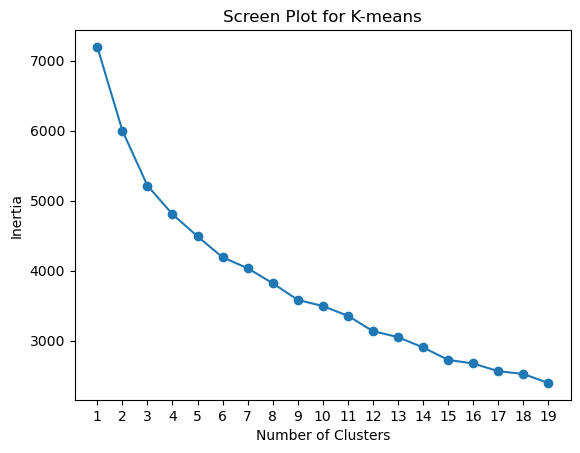

In [47]:
# Visualize
plt.figure()
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Screen Plot for K-means')
plt.xticks(k_range)
plt.show();

In [ ]:
from sklearn.metrics import silhouette_score


In [ ]:
# Look over a range of K values
k_range = np.arange(2, 20)

# Instantiate an empty list of silhouette scores
silhouette_scores = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(corpus_embeddings)
    cluster_labels=k_means_model.predict(corpus_embeddings)
    
    # Get cluster labels and calculate silhouette score
    silhouette = silhouette_score(corpus_embeddings, cluster_labels)
    
    # Append to list
    silhouette_scores.append(silhouette)

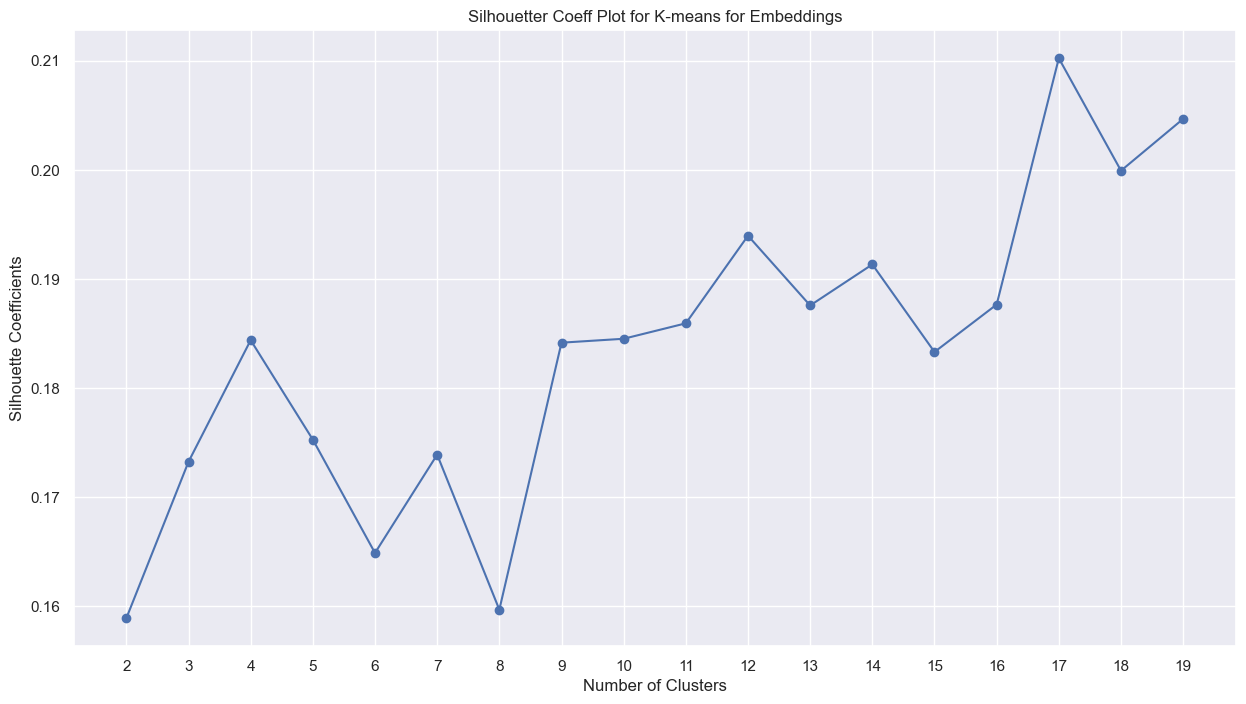

In [ ]:
# plot the silhouette 
plt.figure()
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficients')
plt.title('Silhouetter Coeff Plot for K-means for Embeddings')
plt.xticks(k_range)
plt.show();

So, we have looked at Inertia rate and Silhoutte Scores but neither provide a clear view of the optimum number of clusters. Both methods indicate a high number of clusters at 16 and above. However, from a project outcome and use case standpoint, we do not want to split London into 16 or more neighbourhood clusters as that would overwhelm the user with too many choices. So we would look to keep the clusters between a range of 5-6.

DBSCAN

In [ ]:
epsilon = 2
min_samples = 5

dbscan = DBSCAN(eps = epsilon, min_samples = min_samples)
labels = dbscan.fit_predict(corpus_embeddings)

is_noise = labels == -1
is_not_noise = labels != -1

non_noise_labels = labels[is_not_noise]

print('Number of noise points: ', is_noise.sum())

unique_labels, counts = np.unique(non_noise_labels, return_counts = True)

print('Number of clusters: ', len(counts))
print("Size of clusters: ", counts)

Number of noise points:  93
Number of clusters:  1
Size of clusters:  [7]


As we can see above, DBSCAN does not do very well on our dataset. It results in only one cluster with 7 components in it and has 93 noise points which is 93% of our data set.

**So we will go ahead with KMeans (with 5 clusters) on the BERT embedding as our final model for clustering the neighbourhood of London**

Mapping ChatGPT neighbourhood profiles and clusters from the KMeans modelling (cluster_df) to our original cleaned dataframe to get the final overview of properties per cluster and per suburb

In [48]:
dfgpt.index =cluster_df.index
df_suburb=pd.concat([dfgpt,cluster_df], axis =1)
df_suburb.drop(['corpus'], axis=1, inplace=True)
df_suburb.head(20)

,suburb,suburb_tag,cluster,neighbourhood_vibe
0,Whitechapel,"diverse, multicultural, historic architecture,...",5,Multicultural & artistic
1,Earl's Court,"upmarket, affluent, residential, high-end shop...",4,Shopping & Dining
2,Bayswater,"affluent, residential, upmarket shops and rest...",4,Shopping & Dining
3,Brook Green,"family-friendly, residential, independent busi...",3,Family & student-friendly with community feel
4,Paddington,"business-focused, good transport links, cultur...",1,Green spaces & transport connections
5,Marylebone,"affluent, residential, upmarket shops and rest...",4,Shopping & Dining
6,Notting Hill,"affluent, residential, independent businesses,...",2,Eclectic & Indie
7,Fitzrovia,"artistic, trendy, independent businesses, cult...",2,Eclectic & Indie
8,Battersea,"residential, family-friendly, green spaces, co...",1,Green spaces & transport connections
9,Queen's Park,"family-friendly, residential, independent busi...",3,Family & student-friendly with community feel


In [49]:
df_suburb.shape

(100, 4)

In [50]:
df_suburb.groupby(['cluster']).groups.keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [51]:
df_suburb.to_csv('C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\Data\\ChatGPTprofile.csv',index=False)

In [52]:
df_combined100= pd.merge(df_top100,df_suburb, on='suburb')


In [53]:
df_combined100.head()

,id,name,neighborhood_overview,London_borough,latitude,longitude,minimum_nights,property_type,room_type,price,review_scores_location,suburb,suburb_tag,cluster,neighbourhood_vibe
0,13913,Holiday London DB Room Let-on going,Finsbury Park is a friendly melting pot commun...,Islington,51.56861,-0.11270,1,Private room in rental unit,Private room,$79.00,4.71,Finsbury Park,"affluent, residential, upmarket shops and rest...",4,Shopping & Dining
1,241975,Private room in London & cultural Islington,The neighbourhood has a community based qualit...,Islington,51.56094,-0.10893,4,Private room in rental unit,Private room,$40.00,4.89,Finsbury Park,"affluent, residential, upmarket shops and rest...",4,Shopping & Dining
2,89870,London Holiday Flat Let-Islington,Finsbury Park is a friendly melting pot commun...,Islington,51.56792,-0.11125,1,Entire rental unit,Entire home/apt,$159.00,4.70,Finsbury Park,"affluent, residential, upmarket shops and rest...",4,Shopping & Dining
3,468283,Private room in period house,The street that we live is nice and peaceful. ...,Islington,51.56287,-0.11707,2,Private room in townhouse,Private room,$30.00,4.29,Finsbury Park,"affluent, residential, upmarket shops and rest...",4,Shopping & Dining
4,468438,Lovely room in lovely house,"We're very close to the Emirates stadium, so i...",Islington,51.56217,-0.11416,2,Private room in townhouse,Private room,$30.00,4.53,Finsbury Park,"affluent, residential, upmarket shops and rest...",4,Shopping & Dining


In [54]:
df_combined100.shape

(29279, 15)

In [899]:
df_combined100.groupby(['cluster']).groups.keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [870]:
joblib.dump(df_combined100,'../Data/df_combined100.pkl',compress =9)

['../Data/df_combined100.pkl']

In [873]:
df_combined100.to_csv('C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\Data\\combined100.csv',index=False)

We will use Tableau for interactive visualization of the neighbourhood clusters, overlayed on the map of London.

Image of the Visualization below:
Link:

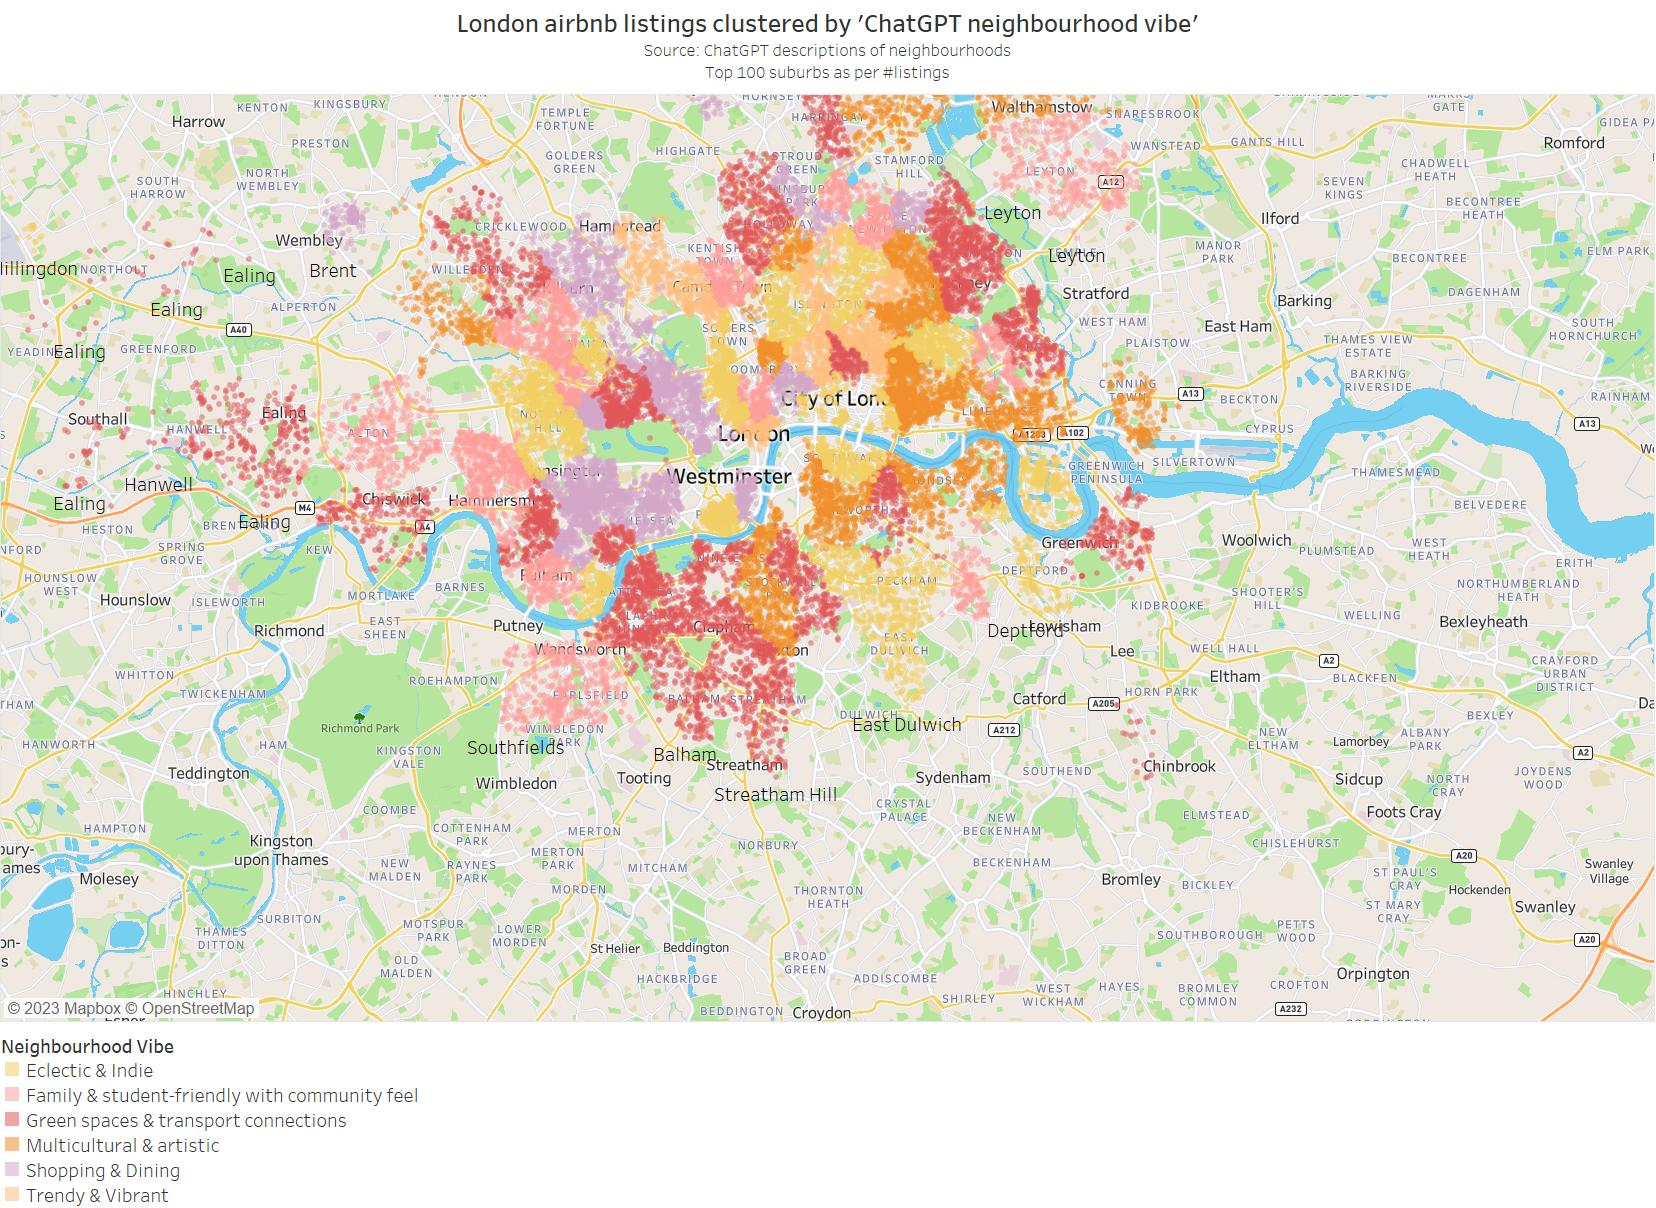

In [36]:
%matplotlib inline
from IPython.display import Image
Image("C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\reports\\Clustering -Chat GPT updated profiles.jpg")

Link to interactive Tableau vizualization <br>
https://public.tableau.com/views/AirbnbNeighbourhoodclustersVisualization/Clustering-ChatGPTupdatedprofiles?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In the above visualization, London neighbourhoods have been mapped based on their distinct vibes (as sourced from Chat GPT). We have used the KMeans model to arrive at these 5 clusters. 

The model has done very well in clustering similar neighbourhoods when comparing against the real-world knowledge of London suburbs -e.g. Upmarket shopping and dining suburbs clustered together are Mayfair, Chelsea, Marylebone, South Hampstead , which we know to be the case. 

However, there are a few suburbs which are slightly misaligned. Looking closely at the suburb_tags, we can start to see that there are a few frequently ocurring words across these neighbourhoods that have led them to be clustered together, even though the less frequent words may be quite distinct from each other e.g. - 'family-friendly' for neighbourhoods like Parson'sGreen, Maida Hill but also for Leyton and New Cross Gate, where the latter two are more diverse and up and coming neighbourhoods

Generating WordClouds for the different Clusters

In [56]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


In [57]:
#iterating through rows and assigning cluster words to each corresponding cluster in the rows
cluster_words = {}
for i, row in df_suburb.iterrows():
    cluster_words[row['cluster']] = row['suburb_tag']


In [58]:
print(cluster_words)

{5: 'urban, diverse, waterfront location, regeneration underway, cultural attractions', 4: 'affluent, residential, upmarket shops and restaurants, green spaces, community-oriented', 3: 'family-friendly, residential, good transport links, green spaces, community-oriented', 1: 'diverse, urban, up-and-coming, good transport links, green spaces', 2: 'Suburban, Heathrow Airport, Brunel University, parks, shopping', 0: 'Trendy, edgy, diverse, artsy, nightlife'}


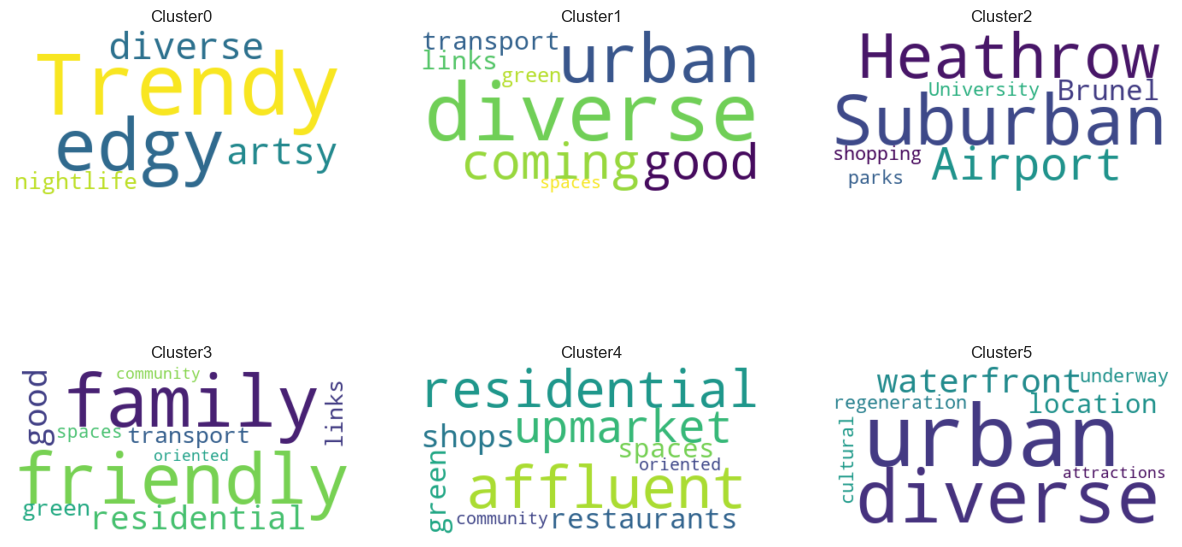

In [59]:
# Word Cloud for all clusters in a subplot format

import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [15, 8]


wordcloud = WordCloud(background_color="white")
plt.subplots(2,3)
for i in range(6):
    wordcloud.generate(cluster_words[i])   
    plt.subplot(2, 3, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Cluster{i}')
    plt.axis('off')
plt.show()

We can see distinct clusters from the above WordCloud visualization. Cluster 0 is edgy,artsy and trendy (e.g. Shoreditch) vs. say Cluster 3 which is more residential and family friendly(e.g. Wimbledon)

**Summary:**
In conclusion, introducing ChatGPT inputs for neighbourhood characteristics proved to be an effective way of incorporating real-world descriptions of the London suburbs and their unique vibes. Applying sentence-embedding and KMeans clustering model on this data led to some very distinct neighbourhood clusters that can form a strong basis for our recommendation system


------------------------------------------------------------------------------------